# Analysis of the Clustering Results

In this notebook, we are going to interpret the clusters based off the player's hierachial cluster. 

The *K-Means Cluster* is used as a means to double confirm the cluster that the player has been placed in from *Hierachial Agglomerative Clustering*. 

In [413]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [414]:
hClusterData = pd.read_csv('./Data/hierarchicalClustering.csv')
kClusterData = pd.read_csv('./Data/kmeansClustering.csv')
AllData = pd.read_csv('./Data/Cleaned/AllData.csv')
AllData = AllData.drop(["Unnamed: 0"], axis=1)
AllData = AllData.rename(columns={'Player':'PLAYER','Team':'TEAM'})

clusterDataframes = [kClusterData,hClusterData,AllData] 

clusterData = pd.DataFrame()
clusterData['PLAYER'] = hClusterData['PLAYER']
for x in clusterDataframes:
    clusterData = clusterData.merge(x,on="PLAYER",how="outer",suffixes=("","_delme"))
clusterData = clusterData[[c for c in clusterData.columns if not c.endswith('_delme')]]
#clusterData = clusterData[['PLAYER','TEAM','hCLUSTER','kCLUSTER','PC1','PC2','PC3','PC4','PC5']]

In [415]:
clusterData.head()

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
0,Stephen Curry,-1.788349,1.685221,-1.400413,-1.224786,-1.228969,GSW,3,7,33,...,1.111,0.1,0.0,0.0,0.0,0.0,0.0,0.0,11.1,0.0
1,Bradley Beal,-0.958652,1.893747,-0.964923,-2.053574,-1.273237,WAS,3,7,28,...,0.407,0.1,0.0,100.0,29.6,0.0,7.4,0.0,3.7,3.7
2,Damian Lillard,-2.039215,2.022334,-0.324951,-2.249559,0.109552,POR,3,7,30,...,1.000,0.1,0.1,100.0,16.0,0.0,4.0,0.0,12.0,16.0
3,Joel Embiid,1.461227,3.961796,-1.739319,0.872781,4.032789,PHI,4,1,27,...,0.698,3.0,2.4,82.1,32.9,0.5,3.8,0.9,7.0,12.1
4,Giannis Antetokounmpo,0.060457,2.934781,0.807754,-0.703425,0.323526,MIL,3,1,26,...,0.596,1.0,0.6,63.8,32.0,0.3,7.4,0.4,9.6,10.7


In [416]:
clusterData[clusterData['hCLUSTER']==1].head(10)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
3,Joel Embiid,1.461227,3.961796,-1.739319,0.872781,4.032789,PHI,4,1,27,...,0.698,3.0,2.4,82.1,32.9,0.5,3.8,0.9,7.0,12.1
4,Giannis Antetokounmpo,0.060457,2.934781,0.807754,-0.703425,0.323526,MIL,3,1,26,...,0.596,1.0,0.6,63.8,32.0,0.3,7.4,0.4,9.6,10.7
7,Zion Williamson,0.627460,2.020545,-0.108474,-1.037724,-0.475770,NOP,3,1,20,...,0.658,1.2,0.7,73.3,35.9,0.3,6.1,0.3,7.1,10.2
8,Kevin Durant,-0.654899,2.228169,-1.253974,-0.550281,1.506168,BKN,4,1,32,...,0.509,0.9,0.5,94.4,50.9,0.5,11.2,0.3,5.6,5.6
12,Nikola Jokic,0.655671,3.572810,-0.068080,3.054112,2.831271,DEN,4,1,26,...,0.601,2.2,1.0,81.1,40.3,1.1,11.4,0.6,6.7,6.6
16,LeBron James,-0.852767,2.354185,0.214468,0.154568,1.130761,LAL,4,1,36,...,0.438,0.7,0.2,80.0,40.3,0.4,9.1,0.4,10.2,2.8
17,Kawhi Leonard,-0.957946,2.275098,-0.289411,0.373120,1.536831,LAC,4,1,30,...,0.525,1.4,0.5,83.3,42.5,0.6,9.0,0.3,5.3,4.7
18,Karl-Anthony Towns,1.007497,2.784601,-1.441358,1.224420,1.751713,MIN,4,1,25,...,0.487,1.5,1.0,79.0,41.9,0.9,10.4,0.6,7.3,7.3
22,Julius Randle,-0.455967,2.640763,-0.521377,1.496583,0.798132,NYK,4,1,26,...,0.502,0.8,0.6,89.4,46.8,0.5,11.9,0.3,6.1,7.0
25,Nikola Vucevic,0.560010,2.270293,-1.764041,2.793394,2.932813,CHI,4,1,30,...,0.407,2.1,0.3,75.0,51.6,1.1,10.4,0.5,4.4,1.8


## Cluster 1 - Elite Scoring Players
From hCLUSTER 1, we can see that the players generally have high PC2 and a low PC3 value.  
This means that these players are offensive minded stars that are not focusing on assist and can shoot the ball well

In [417]:
clusterData[clusterData['hCLUSTER']==2].head(10)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
88,Derrick Rose,-1.226561,0.526784,0.705283,-0.498102,0.994826,NYK,1,2,32,...,0.667,0.0,0.0,100.0,50.0,0.0,16.7,0.0,0.0,16.7
127,Jalen Brunson,-1.000493,0.117046,0.390746,-0.269507,1.118724,DAL,1,2,24,...,0.714,0.0,0.0,75.0,42.9,0.0,0.0,0.0,0.0,28.6
147,Immanuel Quickley,-1.114851,-0.376393,0.152334,-0.562806,1.007208,NYK,1,2,22,...,0.000,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0
149,Lou Williams,-1.133721,0.111925,0.599618,-1.223444,1.268530,ATL,1,2,34,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165,Ty Jerome,-0.984260,-0.306959,0.143810,0.018528,0.924761,OKC,1,2,23,...,2.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
174,Monte Morris,-1.113003,-0.331689,0.373687,0.343198,0.590340,DEN,1,2,26,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
217,George Hill,-0.613781,-0.496297,0.496307,0.028198,0.838248,PHI,1,2,35,...,0.000,0.0,0.0,0.0,66.7,0.0,0.0,0.0,0.0,0.0
224,Cameron Payne,-1.133975,-0.355967,0.724978,0.134358,1.667209,PHX,1,2,26,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
226,Gabriel Deck,0.255774,-0.003429,1.582620,-0.666603,1.691844,OKC,1,2,26,...,0.400,0.4,0.0,0.0,45.0,0.3,15.0,0.0,0.0,0.0
236,Tyrese Maxey,-0.701049,-0.666040,0.577638,-1.199776,1.098627,PHI,1,2,20,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cluster 2 - Assist Maker Guards that operate around the paint
From hCLUSTER 2, we can see that the players generally have a negative low PC1, PC2, PC4 value while they have a postive low PC3 and PC5 value.  
This implies that these player are not centers but are guards that operate around the paint that pass and score mainly around there. 


In [418]:
clusterData[clusterData['hCLUSTER']==3].head(10)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
29,Russell Westbrook,-1.469549,2.675664,2.283966,0.559498,0.201460,WAS,3,3,32,...,0.526,0.4,0.2,91.7,38.6,0.2,11.4,0.1,4.4,5.3
32,Jimmy Butler,-0.746258,2.356470,1.661647,0.423201,-0.425165,MIA,3,3,31,...,0.369,0.4,0.3,87.5,65.1,0.6,21.5,0.1,4.0,5.4
34,Jamal Murray,-1.346119,1.063842,-0.253607,-0.359608,-0.423725,DEN,3,3,24,...,0.652,0.1,0.0,66.7,39.1,0.0,4.3,0.0,0.0,8.7
35,Malcolm Brogdon,-1.459489,1.113530,-0.108338,-0.433463,-0.580527,IND,3,3,28,...,0.000,0.0,0.0,0.0,25.0,0.0,0.0,0.0,25.0,0.0
43,Victor Oladipo,-1.152178,0.821998,0.190938,-0.398214,-1.156978,MIA,3,3,29,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,Fred VanVleet,-1.836394,0.951769,0.530347,1.157664,-1.698462,TOR,3,3,27,...,0.000,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
49,Kemba Walker,-1.661468,0.604399,0.279805,-0.404375,0.009088,OKC,3,3,31,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,Jrue Holiday,-1.044214,1.077104,0.870706,0.153704,-0.708727,MIL,3,3,31,...,0.358,0.1,0.1,83.3,34.0,0.1,7.5,0.1,7.5,5.7
61,Darius Garland,-1.718687,0.574667,0.671766,-0.019815,-1.098783,CLE,3,3,21,...,0.000,0.0,0.0,0.0,66.7,0.0,0.0,0.0,0.0,0.0
62,Kyle Lowry,-1.451091,1.096179,0.514001,1.061516,-1.095912,TOR,3,3,35,...,0.000,0.0,0.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0


## Cluster 3 - Offensive Minded Guards
From hCLUSTER3, we can see that the players have negative PC1 values and positive PC2 Values. 
This implies that the players are guards that are offensive minded.

In [419]:
clusterData[clusterData['hCLUSTER']==4].head(10)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
19,Jaylen Brown,-0.575472,1.277586,-1.199276,-0.267609,-0.745534,BOS,3,4,24,...,0.463,0.2,0.1,87.5,30.0,0.1,10.0,0.2,11.3,5.0
28,Jerami Grant,-0.313915,1.217548,-1.317374,-0.994392,-0.312828,DET,3,4,27,...,0.391,0.2,0.1,62.5,37.5,0.1,4.7,0.0,3.1,6.3
36,Christian Wood,1.133623,1.428008,-1.227483,-0.054369,-0.137027,HOU,4,4,25,...,0.590,0.6,0.4,66.7,28.2,0.1,4.3,0.1,5.1,10.3
38,Terry Rozier,-1.214204,0.526801,-0.870426,0.198173,-1.203790,CHA,3,4,27,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,Gordon Hayward,-0.592573,1.065909,-0.859553,-0.122713,-1.247909,CHA,3,4,31,...,0.611,0.2,0.0,100.0,38.9,0.0,2.8,0.0,0.0,2.8
46,Malik Beasley,-0.508929,0.096424,-2.050072,-0.537873,-1.123689,MIN,6,4,24,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,Michael Porter Jr.,0.566048,0.516308,-2.264816,0.127193,-0.276734,DEN,6,4,23,...,0.559,0.1,0.1,100.0,23.5,0.0,0.0,0.0,5.9,5.9
54,Norman Powell,-0.700648,0.336908,-1.482030,-0.851631,-1.512942,POR,3,4,28,...,0.667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,Andrew Wiggins,-0.170770,0.918077,-0.986294,-0.138896,-1.081983,GSW,3,4,26,...,0.615,0.5,0.1,66.7,36.1,0.1,6.6,0.0,2.5,4.9
59,John Collins,1.243078,1.195174,-1.480482,0.610822,0.009578,ATL,4,4,23,...,0.717,1.0,0.3,75.0,22.7,0.1,3.5,0.2,7.1,6.6


## Cluster 4 - Offensive Minded Forwards
From hCLUSTER4, we can see that the PC2 values are postive and PC3 values are negative
This implies that the players are scoring focused forwards that do not operate mainly around the paint. 


In [420]:
clusterData[clusterData['hCLUSTER']==5].head(10)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
42,Kristaps Porzingis,1.143098,1.482636,-1.900635,0.773354,1.866044,DAL,4,5,25,...,0.676,1.3,0.7,84.2,27.0,0.2,4.5,0.3,6.8,8.6
97,Al Horford,0.366917,0.509944,-0.392511,1.560721,1.608877,BOS,4,5,35,...,0.550,1.0,0.0,0.0,29.4,0.3,7.3,0.2,5.5,0.0
106,LaMarcus Aldridge,0.764038,0.719977,-1.794909,0.629416,2.619008,BKN,4,5,35,...,0.574,0.9,0.7,77.3,37.4,0.5,10.4,0.2,4.3,9.6
111,Marcus Morris Sr.,0.120989,0.190642,-1.991726,0.182764,1.403355,LAC,6,5,31,...,0.762,0.7,0.3,93.8,25.4,0.1,3.2,0.1,4.0,6.3
112,Carmelo Anthony,-0.036718,0.441522,-1.597540,-1.260431,2.523772,POR,6,5,37,...,0.784,1.0,0.4,85.3,16.1,0.1,4.1,0.1,2.8,7.8
114,Danilo Gallinari,0.306770,0.559347,-2.022749,-0.810245,1.647502,ATL,6,5,32,...,0.513,0.6,0.2,83.3,33.3,0.1,4.0,0.1,4.7,4.0
125,Alec Burks,-0.675784,0.138024,-0.518823,-0.212645,1.018755,NYK,6,5,29,...,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135,Kevin Love,0.376157,0.439813,-0.961516,0.774176,1.986855,CLE,4,5,32,...,0.373,0.6,0.1,100.0,39.8,0.2,7.2,0.2,7.2,1.2
148,Rudy Gay,0.114414,0.011366,-0.926815,-0.098157,1.200327,SAS,6,5,34,...,0.650,0.3,0.1,75.0,36.3,0.1,5.0,0.1,6.3,5.0
157,Serge Ibaka,1.181988,0.509456,-0.575718,0.784016,1.465635,LAC,4,5,31,...,0.444,0.3,0.0,100.0,23.8,0.1,6.3,0.1,9.5,1.6


## Cluster 5 - Shooting Big Man
From hCLUSTER5, we can that the PC2 is positive and PC3 and PC5 is negative
Coupled together with the stats, we can tell that the players in this clusters are big men that can shoot the ball well

In [421]:
clusterData[clusterData['hCLUSTER']==6].head(10)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
99,Joe Harris,-0.365783,-0.340215,-2.149218,1.102692,-1.404862,BKN,2,6,29,...,0.000,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
109,Mikal Bridges,-0.140625,-0.173083,-1.254269,1.062932,-1.468444,PHX,2,6,24,...,0.857,0.0,0.0,0.0,28.6,0.0,0.0,0.0,0.0,0.0
115,Duncan Robinson,-0.755151,-0.631918,-2.007743,1.882769,-1.375958,MIA,2,6,27,...,0.000,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
121,Kyle Kuzma,0.084971,-0.088275,-0.778933,0.741420,-0.511563,LAL,2,6,25,...,0.938,0.1,0.0,50.0,43.8,0.0,6.3,0.0,0.0,6.3
129,Seth Curry,-1.132628,-0.285697,-1.181713,0.656660,0.728952,PHI,6,6,30,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143,Davis Bertans,-0.271265,-0.992299,-2.036485,0.888944,-0.691706,WAS,2,6,28,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155,Armoni Brooks,-0.437371,-0.819819,-1.154579,0.119375,0.029789,HOU,6,6,23,...,0.000,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
156,Lonnie Walker IV,-0.713183,-0.699297,-0.665147,-0.344257,0.387825,SAS,6,6,22,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162,Reggie Bullock,-0.618360,-0.790644,-1.774946,1.540336,-0.252187,NYK,2,6,30,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164,Patty Mills,-1.304931,-0.887048,-0.759477,0.232010,0.640607,SAS,6,6,32,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cluster 6 - Effective Shooters
From hCLUSTERS, we can see that PC2 and PC3 is negative. 
Coupled together with the stats, we can tell that the players in this clusters are effective shooters of the ball. They are good at pull ups and catch and shoot. 

In [422]:
clusterData[clusterData['hCLUSTER']==7].head(10)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
0,Stephen Curry,-1.788349,1.685221,-1.400413,-1.224786,-1.228969,GSW,3,7,33,...,1.111,0.1,0.0,0.0,0.0,0.0,0.0,0.0,11.1,0.0
1,Bradley Beal,-0.958652,1.893747,-0.964923,-2.053574,-1.273237,WAS,3,7,28,...,0.407,0.1,0.0,100.0,29.6,0.0,7.4,0.0,3.7,3.7
2,Damian Lillard,-2.039215,2.022334,-0.324951,-2.249559,0.109552,POR,3,7,30,...,1.000,0.1,0.1,100.0,16.0,0.0,4.0,0.0,12.0,16.0
5,Luka Doncic,-1.551258,2.918089,0.998069,-1.925608,0.556996,DAL,3,7,22,...,0.774,0.3,0.3,86.4,31.0,0.1,8.3,0.0,3.6,13.1
6,Zach LaVine,-1.187326,1.609068,-0.912410,-1.586388,-1.598562,CHI,3,7,26,...,0.185,0.0,0.0,0.0,40.7,0.0,7.4,0.1,11.1,0.0
9,Kyrie Irving,-1.283702,1.778389,-0.272716,-0.867786,-0.306586,BKN,3,7,29,...,0.609,0.1,0.1,100.0,39.1,0.0,0.0,0.0,4.3,8.7
10,Jayson Tatum,-0.995756,1.886839,-0.752877,-0.989526,0.242650,BOS,3,7,23,...,0.628,0.6,0.3,79.2,26.2,0.1,4.3,0.0,1.2,7.3
11,Donovan Mitchell,-1.749747,1.567781,-0.061717,-1.123079,-0.219386,UTA,3,7,24,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,Devin Booker,-1.159293,1.725312,-0.544644,-1.046759,-0.258404,PHX,3,7,24,...,0.550,0.3,0.1,90.0,40.0,0.1,10.0,0.1,6.0,5.0
14,Trae Young,-2.515268,1.824207,1.643631,-1.763376,-0.541945,ATL,3,7,22,...,0.000,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0


## Cluster 7 - Scoring Shooters 
From hCLUSTERS, we can see that PC1 and PC4 is negative while PC2 is positive. 
Coupled together with the stats, we can tell that the players In this clusters focus on scoring and do not mainly score from the paint.

In [423]:
clusterData[clusterData['hCLUSTER']==8].head(10)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
82,Clint Capela,2.510565,1.419008,1.277309,0.345471,-1.203784,ATL,5,8,27,...,0.564,0.4,0.1,58.3,20.8,0.1,5.0,0.1,8.9,5.9
86,Andre Drummond,2.092355,1.925814,1.747405,0.407784,0.487290,LAL,5,8,27,...,0.490,1.2,0.6,56.5,30.3,0.4,5.8,0.6,9.9,7.8
94,Rudy Gobert,2.524628,1.699598,0.837206,0.352663,-1.628021,UTA,5,8,29,...,0.358,0.1,0.1,75.0,34.0,0.0,1.9,0.1,7.5,7.5
108,Montrezl Harrell,1.723285,1.155139,0.362392,-0.775531,0.646557,LAL,5,8,27,...,0.722,1.1,0.5,92.5,21.1,0.1,2.2,0.3,8.9,7.4
122,Jarrett Allen,2.093523,1.271601,0.256400,0.235493,-0.036875,CLE,5,8,23,...,0.533,0.3,0.2,71.4,38.9,0.0,3.3,0.1,6.7,7.8
152,Wendell Carter Jr.,1.608603,1.013784,0.068176,0.367301,0.139694,ORL,5,8,22,...,0.566,0.6,0.4,79.2,30.1,0.1,3.5,0.2,7.0,8.4
154,Enes Freedom,2.031371,1.057984,0.484830,-0.584437,0.473712,POR,5,8,29,...,0.667,0.6,0.1,87.5,24.2,0.1,5.2,0.2,10.5,2.6
171,Mason Plumlee,1.498448,1.268310,2.213821,1.180290,-0.498214,DET,5,8,31,...,0.357,0.4,0.3,75.0,55.1,0.3,8.1,0.2,5.9,6.5
204,Robin Lopez,1.706773,0.247169,-0.029174,-0.784865,0.446996,WAS,5,8,33,...,0.884,1.1,0.2,68.4,17.7,0.0,1.0,0.2,8.1,4.5
205,Ivica Zubac,1.959630,0.769398,0.402327,0.020075,-0.002343,LAC,5,8,24,...,0.742,0.3,0.1,90.0,33.3,0.1,7.6,0.1,6.1,7.6


## Cluster 8 - Traditional Big Men 
From hCLUSTERS, we can see that PC1 and PC2 is positive while the rest of the PCs are mixed. 
Coupled together with the stats, we can tell this players are primarily based around in the paint area during the game. They really make most of their points there.


In [424]:
clusterData[clusterData['hCLUSTER']==9].head(10)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
77,Terrence Ross,-0.682801,0.003844,-0.987379,-1.237127,0.405156,ORL,6,9,30,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,Jaren Jackson Jr.,1.214641,0.762239,-0.930893,-0.777723,-0.759816,MEM,6,9,21,...,0.667,0.5,0.2,100.0,22.2,0.3,16.7,0.1,5.6,5.6
98,Marvin Bagley III,1.240080,0.364886,-0.865254,-1.028557,0.369064,SAC,6,9,22,...,0.627,0.7,0.3,78.6,24.5,0.0,1.8,0.3,10.9,6.4
103,Chris Boucher,1.279341,0.524795,-1.318951,-0.300340,-0.440334,TOR,6,9,28,...,0.500,0.0,0.1,83.3,57.1,0.0,0.0,0.0,7.1,21.4
120,Cole Anthony,-0.668329,0.481876,0.824514,-1.730869,0.009013,ORL,3,9,21,...,2.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132,Brook Lopez,1.272380,0.485862,-1.783421,-0.540211,-0.040634,MIL,6,9,33,...,0.718,0.4,0.2,73.7,16.4,0.1,3.6,0.1,8.2,9.1
139,Jordan Poole,-0.705534,-0.515030,-0.960308,-0.755734,0.304539,GSW,6,9,22,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141,Malik Monk,-0.587195,-0.448421,-0.853252,-1.111674,0.368917,CHA,6,9,23,...,0.000,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0
144,James Wiseman,1.466678,0.142162,-0.528330,-0.699825,-0.509278,GSW,5,9,20,...,0.427,0.6,0.1,50.0,30.6,0.2,4.8,0.3,9.7,4.0
146,Bobby Portis,0.912092,0.243553,-0.915687,0.262819,0.531703,MIL,6,9,26,...,0.678,0.6,0.0,50.0,23.1,0.0,0.0,0.1,4.1,2.5


In [425]:
clusterData[clusterData['TEAM']=='PHI'].sort_values(by=['hCLUSTER']).head(20)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
3,Joel Embiid,1.461227,3.961796,-1.739319,0.872781,4.032789,PHI,4,1,27,...,0.698,3.0,2.4,82.1,32.9,0.5,3.8,0.9,7.0,12.1
47,Tobias Harris,-0.311122,1.455940,-0.549460,0.407837,0.533764,PHI,4,1,28,...,0.639,0.9,0.3,83.3,35.1,0.2,6.3,0.1,3.4,5.8
217,George Hill,-0.613781,-0.496297,0.496307,0.028198,0.838248,PHI,1,2,35,...,0.000,0.0,0.0,0.0,66.7,0.0,0.0,0.0,0.0,0.0
236,Tyrese Maxey,-0.701049,-0.666040,0.577638,-1.199776,1.098627,PHI,1,2,20,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,Ben Simmons,-0.365419,1.377588,1.737425,1.443988,-0.499734,PHI,2,3,24,...,0.472,0.6,0.2,75.0,49.7,0.4,14.9,0.1,5.0,3.7
387,Matisse Thybulle,-0.022761,-1.382110,0.520683,1.519472,-1.380689,PHI,2,3,24,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118,Shake Milton,-0.917500,0.124958,0.233179,-0.557427,-0.297279,PHI,3,4,24,...,0.000,0.0,0.0,0.0,66.7,0.0,0.0,0.0,0.0,0.0
129,Seth Curry,-1.132628,-0.285697,-1.181713,0.656660,0.728952,PHI,6,6,30,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,Danny Green,-0.215922,-0.553438,-1.019359,1.660395,-1.535854,PHI,2,6,34,...,0.667,0.0,0.0,100.0,33.3,0.0,0.0,0.0,33.3,33.3
202,Furkan Korkmaz,-0.540420,-0.894636,-0.959851,0.005732,-0.117309,PHI,6,6,23,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [426]:
clusterData[clusterData['TEAM']=='BKN'].sort_values(by=['hCLUSTER']).head(20)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
8,Kevin Durant,-0.654899,2.228169,-1.253974,-0.550281,1.506168,BKN,4,1,32,...,0.509,0.9,0.5,94.4,50.9,0.5,11.2,0.3,5.6,5.6
247,Mike James,-1.410005,-0.233709,1.784479,-0.687085,2.280999,BKN,1,2,30,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
211,Bruce Brown,0.633171,-0.346563,0.595279,0.379649,-1.229398,BKN,2,4,24,...,0.400,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0
294,Nic Claxton,1.580032,-0.216923,0.831285,0.000051,-0.826898,BKN,5,4,22,...,0.533,0.1,0.1,50.0,46.7,0.0,6.7,0.0,6.7,13.3
106,LaMarcus Aldridge,0.764038,0.719977,-1.794909,0.629416,2.619008,BKN,4,5,35,...,0.574,0.9,0.7,77.3,37.4,0.5,10.4,0.2,4.3,9.6
160,Blake Griffin,0.156553,0.567508,-0.247082,0.564461,1.673279,BKN,4,5,32,...,0.606,0.5,0.6,71.8,26.3,0.2,6.6,0.1,2.9,14.6
99,Joe Harris,-0.365783,-0.340215,-2.149218,1.102692,-1.404862,BKN,2,6,29,...,0.000,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
197,Landry Shamet,-0.568450,-0.935470,-1.260225,0.204377,-0.467056,BKN,2,6,24,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304,Timothe Luwawu-Cabarrot,-0.034080,-1.224776,-0.564865,0.148119,-0.695593,BKN,2,6,26,...,2.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
332,Tyler Johnson,-0.710651,-1.460398,0.020238,1.071569,1.271587,BKN,1,6,29,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [427]:
clusterData[clusterData['TEAM']=='MIL'].sort_values(by=['hCLUSTER']).head(20)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
4,Giannis Antetokounmpo,0.060457,2.934781,0.807754,-0.703425,0.323526,MIL,3,1,26,...,0.596,1.0,0.6,63.8,32.0,0.3,7.4,0.4,9.6,10.7
39,Khris Middleton,-0.979256,1.235244,-0.477677,-0.249274,0.271080,MIL,3,1,29,...,0.659,0.5,0.1,100.0,31.7,0.1,4.8,0.1,6.3,3.2
287,Jeff Teague,-0.953765,-0.311600,1.100145,-1.109172,2.133533,MIL,1,2,33,...,0.800,0.0,0.1,100.0,40.0,0.0,0.0,0.0,0.0,40.0
58,Jrue Holiday,-1.044214,1.077104,0.870706,0.153704,-0.708727,MIL,3,3,31,...,0.358,0.1,0.1,83.3,34.0,0.1,7.5,0.1,7.5,5.7
389,P.J. Tucker,0.193719,-1.029211,0.223611,1.440385,-1.057838,MIL,2,3,36,...,0.000,0.0,0.0,0.0,80.0,0.0,40.0,0.0,0.0,0.0
169,Donte DiVincenzo,-0.496204,-0.296743,0.070207,1.246318,-0.841713,MIL,2,6,24,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179,Bryn Forbes,-0.461876,-1.127356,-1.503224,-0.034746,0.992058,MIL,6,6,27,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284,Pat Connaughton,0.145720,-0.989270,-0.654359,1.313838,-0.341027,MIL,2,6,28,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132,Brook Lopez,1.272380,0.485862,-1.783421,-0.540211,-0.040634,MIL,6,9,33,...,0.718,0.4,0.2,73.7,16.4,0.1,3.6,0.1,8.2,9.1
146,Bobby Portis,0.912092,0.243553,-0.915687,0.262819,0.531703,MIL,6,9,26,...,0.678,0.6,0.0,50.0,23.1,0.0,0.0,0.1,4.1,2.5


In [428]:
clusterData[clusterData['TEAM']=='NYK'].sort_values(by=['hCLUSTER']).head(20)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
22,Julius Randle,-0.455967,2.640763,-0.521377,1.496583,0.798132,NYK,4,1,26,...,0.502,0.8,0.6,89.4,46.8,0.5,11.9,0.3,6.1,7.0
88,Derrick Rose,-1.226561,0.526784,0.705283,-0.498102,0.994826,NYK,1,2,32,...,0.667,0.0,0.0,100.0,50.0,0.0,16.7,0.0,0.0,16.7
147,Immanuel Quickley,-1.114851,-0.376393,0.152334,-0.562806,1.007208,NYK,1,2,22,...,0.000,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0
337,Taj Gibson,1.317629,-0.147294,1.042246,0.930994,0.023251,NYK,5,3,36,...,0.875,0.2,0.0,50.0,29.2,0.0,8.3,0.0,8.3,4.2
60,RJ Barrett,-0.467912,0.665396,-0.763161,-0.065954,-1.147378,NYK,3,4,21,...,0.568,0.1,0.0,50.0,40.5,0.0,5.4,0.0,0.0,2.7
125,Alec Burks,-0.675784,0.138024,-0.518823,-0.212645,1.018755,NYK,6,5,29,...,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162,Reggie Bullock,-0.618360,-0.790644,-1.774946,1.540336,-0.252187,NYK,2,6,30,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227,Mitchell Robinson,1.872858,0.055740,2.049493,0.916124,-2.010570,NYK,5,8,23,...,0.800,0.1,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0
350,Nerlens Noel,1.747565,0.295097,1.737014,0.317898,-2.087692,NYK,5,8,27,...,0.000,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
175,Elfrid Payton,-0.443659,-0.117343,1.305902,-0.454397,0.024079,NYK,1,9,27,...,0.000,0.0,0.0,0.0,54.5,0.0,0.0,0.0,9.1,0.0


In [429]:
clusterData[clusterData['TEAM']=='ATL'].sort_values(by=['hCLUSTER']).head(20)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
149,Lou Williams,-1.133721,0.111925,0.599618,-1.223444,1.268530,ATL,1,2,34,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
360,Brandon Goodwin,-0.922038,-1.112033,1.315315,-0.418683,0.682501,ATL,1,2,25,...,0.000,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
59,John Collins,1.243078,1.195174,-1.480482,0.610822,0.009578,ATL,4,4,23,...,0.717,1.0,0.3,75.0,22.7,0.1,3.5,0.2,7.1,6.6
71,Bogdan Bogdanovic,-1.028811,0.160748,-1.063342,1.085744,-0.763758,ATL,2,4,28,...,0.000,0.0,0.0,0.0,40.0,0.0,10.0,0.0,10.0,0.0
85,De'Andre Hunter,0.036553,0.693812,-1.210432,-0.487609,-0.125007,ATL,6,4,23,...,0.794,0.4,0.3,87.5,14.7,0.1,5.9,0.2,14.7,11.8
140,Kevin Huerter,-0.728960,-0.105368,-0.422041,0.871503,-0.964902,ATL,2,4,22,...,0.000,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
151,Cam Reddish,-0.059533,-0.303826,-0.644761,-1.227014,-1.414829,ATL,6,4,21,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,Danilo Gallinari,0.306770,0.559347,-2.022749,-0.810245,1.647502,ATL,6,5,32,...,0.513,0.6,0.2,83.3,33.3,0.1,4.0,0.1,4.7,4.0
338,Tony Snell,-0.562209,-1.377857,-0.951228,1.362295,1.574403,ATL,1,6,29,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
371,Solomon Hill,-0.003859,-1.108769,-0.056033,1.117503,0.244175,ATL,2,6,30,...,0.000,0.0,0.0,0.0,33.3,0.0,0.0,0.0,33.3,0.0


In [430]:
clusterData[clusterData['TEAM']=='MIA'].sort_values(by=['hCLUSTER']).head(20)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
53,Bam Adebayo,0.823547,2.134056,-0.060242,1.615308,1.346876,MIA,4,1,23,...,0.364,0.8,0.4,80.0,54.0,0.8,14.9,0.4,6.3,4.1
32,Jimmy Butler,-0.746258,2.356470,1.661647,0.423201,-0.425165,MIA,3,3,31,...,0.369,0.4,0.3,87.5,65.1,0.6,21.5,0.1,4.0,5.4
43,Victor Oladipo,-1.152178,0.821998,0.190938,-0.398214,-1.156978,MIA,3,3,29,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,Goran Dragic,-0.974879,0.314860,0.301004,0.352635,0.096185,MIA,1,3,35,...,0.364,0.0,0.1,100.0,63.6,0.1,13.6,0.0,4.5,9.1
375,Andre Iguodala,-0.252711,-0.970386,1.052088,2.424640,0.219754,MIA,2,3,37,...,0.296,0.0,0.0,50.0,63.0,0.0,11.1,0.0,3.7,3.7
83,Tyler Herro,-0.874905,0.208727,-0.256797,-0.250568,-0.466860,MIA,3,4,21,...,1.250,0.0,0.0,0.0,50.0,0.0,25.0,0.0,0.0,0.0
90,Kendrick Nunn,-0.794396,-0.101760,-0.783127,0.225869,-0.650635,MIA,2,4,25,...,0.333,0.0,0.0,0.0,50.0,0.0,33.3,0.0,0.0,0.0
115,Duncan Robinson,-0.755151,-0.631918,-2.007743,1.882769,-1.375958,MIA,2,6,27,...,0.000,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
193,Trevor Ariza,0.144773,-0.425646,-0.695739,1.076861,-0.444052,MIA,2,6,36,...,1.000,0.2,0.0,0.0,40.0,0.1,20.0,0.0,0.0,0.0
270,Dewayne Dedmon,1.850959,0.277306,0.718195,-0.383112,1.163885,MIA,5,8,31,...,0.545,0.1,0.1,100.0,36.4,0.1,9.1,0.1,9.1,9.1


In [431]:
clusterData[clusterData['TEAM']=='UTA'].sort_values(by=['hCLUSTER']).head(20)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
72,Mike Conley,-1.814314,0.803562,0.558837,0.695210,-0.600272,UTA,3,3,33,...,0.000,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0
138,Joe Ingles,-1.509012,0.106048,0.125288,1.738981,-0.092168,UTA,2,3,33,...,0.000,0.0,0.0,0.0,100.0,0.1,44.4,0.0,0.0,0.0
276,Royce O'Neale,-0.279376,-0.347621,-0.000684,3.169024,-1.478032,UTA,2,3,28,...,0.000,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
66,Bojan Bogdanovic,-0.421664,0.605176,-1.945479,-0.380359,-0.495964,UTA,6,4,32,...,0.640,0.3,0.3,90.0,29.0,0.1,8.0,0.1,10.0,10.0
278,Georges Niang,0.062879,-1.116898,-1.479769,0.764564,0.469276,UTA,6,6,28,...,0.000,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0
11,Donovan Mitchell,-1.749747,1.567781,-0.061717,-1.123079,-0.219386,UTA,3,7,24,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,Jordan Clarkson,-1.004616,0.654646,-0.746586,-1.093665,-0.367700,UTA,3,7,29,...,0.900,0.0,0.1,100.0,30.0,0.0,10.0,0.0,0.0,20.0
94,Rudy Gobert,2.524628,1.699598,0.837206,0.352663,-1.628021,UTA,5,8,29,...,0.358,0.1,0.1,75.0,34.0,0.0,1.9,0.1,7.5,7.5
330,Derrick Favors,1.826516,-0.134092,1.415377,-0.411518,-0.850909,UTA,5,8,29,...,0.444,0.0,0.0,0.0,33.3,0.0,0.0,0.0,0.0,0.0


In [432]:
clusterData[clusterData['TEAM']=='PHX'].sort_values(by=['hCLUSTER']).head(20)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
91,Deandre Ayton,2.043056,1.627395,-0.075315,1.027017,0.858844,PHX,4,1,22,...,0.633,1.3,0.3,95.0,29.4,0.2,4.0,0.3,6.1,3.1
224,Cameron Payne,-1.133975,-0.355967,0.724978,0.134358,1.667209,PHX,1,2,26,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
357,E'Twaun Moore,-0.269152,-0.994139,0.927510,-0.519233,1.135792,PHX,1,2,32,...,2.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,Chris Paul,-2.109673,1.513326,1.480545,0.437242,1.597664,PHX,1,3,36,...,0.682,0.1,0.0,100.0,36.4,0.0,9.1,0.0,0.0,4.5
213,Dario Saric,0.783178,0.119453,-0.547162,0.588020,0.775071,PHX,6,5,27,...,0.482,0.4,0.3,83.3,40.4,0.2,7.9,0.1,5.3,7.9
297,Frank Kaminsky,0.751160,-0.293194,-0.002261,0.410639,1.483108,PHX,6,5,28,...,0.585,0.2,0.2,66.7,34.1,0.1,7.3,0.0,2.4,14.6
109,Mikal Bridges,-0.140625,-0.173083,-1.254269,1.062932,-1.468444,PHX,2,6,24,...,0.857,0.0,0.0,0.0,28.6,0.0,0.0,0.0,0.0,0.0
178,Jae Crowder,-0.085049,-0.295055,-1.033288,1.969797,0.005446,PHX,2,6,30,...,0.400,0.0,0.0,100.0,50.0,0.1,30.0,0.0,0.0,10.0
189,Cameron Johnson,-0.239451,-0.892064,-1.073328,1.190001,-0.299335,PHX,2,6,25,...,0.000,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
329,Torrey Craig,0.539756,-0.867782,0.018458,0.086042,0.267739,PHX,6,6,30,...,0.000,0.0,0.0,0.0,50.0,0.0,0.0,0.0,50.0,0.0


In [433]:
clusterData[clusterData['TEAM']=='DEN'].sort_values(by=['hCLUSTER']).head(20)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
12,Nikola Jokic,0.655671,3.572810,-0.068080,3.054112,2.831271,DEN,4,1,26,...,0.601,2.2,1.0,81.1,40.3,1.1,11.4,0.6,6.7,6.6
174,Monte Morris,-1.113003,-0.331689,0.373687,0.343198,0.590340,DEN,1,2,26,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
239,Austin Rivers,-1.000056,-0.862154,0.539041,0.497283,0.714272,DEN,1,2,28,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,Jamal Murray,-1.346119,1.063842,-0.253607,-0.359608,-0.423725,DEN,3,3,24,...,0.652,0.1,0.0,66.7,39.1,0.0,4.3,0.0,0.0,8.7
311,Facundo Campazzo,-1.208406,-0.891489,0.999955,1.278367,-0.050968,DEN,1,3,30,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,Michael Porter Jr.,0.566048,0.516308,-2.264816,0.127193,-0.276734,DEN,6,4,23,...,0.559,0.1,0.1,100.0,23.5,0.0,0.0,0.0,5.9,5.9
126,Will Barton,-0.448280,0.197710,-0.374944,-0.009257,-0.516341,DEN,2,4,30,...,0.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0
131,Aaron Gordon,0.249947,0.749205,0.220048,0.349863,0.765690,DEN,4,4,25,...,0.451,0.3,0.4,75.0,34.5,0.2,8.0,0.2,7.1,10.6
208,Paul Millsap,0.643094,0.127318,-0.149320,0.425804,0.795619,DEN,6,5,36,...,0.593,0.4,0.1,80.0,39.6,0.1,5.5,0.1,5.5,5.5
233,JaMychal Green,0.807914,-0.427417,-0.634997,0.611181,0.724328,DEN,6,5,31,...,0.595,0.2,0.0,50.0,26.2,0.0,2.4,0.1,9.5,2.4


In [434]:
clusterData[clusterData['TEAM']=='LAC'].sort_values(by=['hCLUSTER']).head(20)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
17,Kawhi Leonard,-0.957946,2.275098,-0.289411,0.373120,1.536831,LAC,4,1,30,...,0.525,1.4,0.5,83.3,42.5,0.6,9.0,0.3,5.3,4.7
26,Paul George,-1.117739,1.697151,-0.437560,0.199984,-0.208307,LAC,3,1,31,...,0.508,0.2,0.1,75.0,37.3,0.1,8.5,0.1,8.5,3.4
321,Yogi Ferrell,-1.742094,-1.172533,1.628841,0.609062,3.004485,LAC,1,2,28,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
333,Rajon Rondo,-1.141811,-0.445241,2.113429,0.817449,1.815623,LAC,1,2,35,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,Marcus Morris Sr.,0.120989,0.190642,-1.991726,0.182764,1.403355,LAC,6,5,31,...,0.762,0.7,0.3,93.8,25.4,0.1,3.2,0.1,4.0,6.3
157,Serge Ibaka,1.181988,0.509456,-0.575718,0.784016,1.465635,LAC,4,5,31,...,0.444,0.3,0.0,100.0,23.8,0.1,6.3,0.1,9.5,1.6
209,DeMarcus Cousins,0.708785,0.440256,-0.117993,0.801863,2.105117,LAC,4,5,30,...,0.528,0.7,0.3,75.0,40.2,0.3,8.7,0.3,8.7,6.3
166,Reggie Jackson,-0.748074,-0.227536,-0.083440,0.583437,0.574030,LAC,1,6,31,...,0.000,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0
228,Luke Kennard,-0.582943,-0.893396,-0.825378,-0.075298,1.247554,LAC,6,6,25,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234,Nicolas Batum,0.033038,-0.503995,-0.449950,2.297551,0.121068,LAC,2,6,32,...,0.192,0.0,0.0,75.0,61.5,0.0,7.7,0.0,3.8,7.7


In [435]:
clusterData[clusterData['TEAM']=='DAL'].sort_values(by=['hCLUSTER']).head(20)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
127,Jalen Brunson,-1.000493,0.117046,0.390746,-0.269507,1.118724,DAL,1,2,24,...,0.714,0.0,0.0,75.0,42.9,0.0,0.0,0.0,0.0,28.6
293,Trey Burke,-0.807006,-1.105813,0.064094,-0.728354,1.630587,DAL,1,2,28,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,Tim Hardaway Jr.,-0.321008,0.158463,-2.145300,-1.165254,0.002657,DAL,6,4,29,...,0.714,0.0,0.0,75.0,28.6,0.0,0.0,0.0,0.0,28.6
136,Josh Richardson,-0.685652,-0.035816,-0.037089,0.134578,-0.655898,DAL,2,4,27,...,0.400,0.0,0.0,0.0,20.0,0.0,20.0,0.0,20.0,0.0
340,Willie Cauley-Stein,1.457138,-0.386829,0.914307,0.181760,-0.549802,DAL,5,4,27,...,0.000,0.0,0.0,0.0,66.7,0.0,16.7,0.0,33.3,0.0
42,Kristaps Porzingis,1.143098,1.482636,-1.900635,0.773354,1.866044,DAL,4,5,25,...,0.676,1.3,0.7,84.2,27.0,0.2,4.5,0.3,6.8,8.6
181,Dorian Finney-Smith,0.063308,-0.400295,-0.751456,1.767058,-0.819648,DAL,2,6,28,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259,JJ Redick,-0.838529,-1.613477,-0.530047,-0.133892,0.989256,DAL,6,6,37,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
271,Maxi Kleber,0.268142,-0.623191,-1.042067,1.834321,0.308344,DAL,2,6,29,...,0.875,0.0,0.0,100.0,50.0,0.0,0.0,0.0,0.0,12.5
392,Nicolo Melli,0.130278,-1.283946,0.769316,1.217272,1.464504,DAL,1,6,30,...,0.444,0.1,0.0,0.0,38.9,0.0,11.1,0.0,5.6,5.6


In [436]:
clusterData[clusterData['TEAM']=='POR'].sort_values(by=['hCLUSTER']).head(20)

,PLAYER,PC1,PC2,PC3,PC4,PC5,TEAM,kCLUSTER,hCLUSTER,AGE,...,PTSPerPost Touch,PostTouchFGM,PostTouchFTM,PostTouchFT%,PostTouchPASS%,PostTouchAST,PostTouchAST%,PostTouchTO,PostTouchTOV%,PostTouchPF%
145,Jusuf Nurkic,1.352742,1.183625,0.317412,0.930422,0.594052,POR,4,1,26,...,0.447,0.6,0.2,50.0,32.5,0.2,7.0,0.2,7.9,6.1
241,Anfernee Simons,-0.645727,-0.897891,-0.394504,-0.516461,1.819612,POR,1,2,22,...,0.000,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
54,Norman Powell,-0.700648,0.336908,-1.482030,-0.851631,-1.512942,POR,3,4,28,...,0.667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
282,Derrick Jones Jr.,0.695006,-0.871073,-0.130446,-0.067302,-1.279004,POR,2,4,24,...,0.000,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
112,Carmelo Anthony,-0.036718,0.441522,-1.597540,-1.260431,2.523772,POR,6,5,37,...,0.784,1.0,0.4,85.3,16.1,0.1,4.1,0.1,2.8,7.8
222,Robert Covington,0.166996,-0.090442,-0.657226,2.184890,-1.278088,POR,2,6,30,...,0.000,0.0,0.0,0.0,100.0,0.0,28.6,0.0,0.0,0.0
2,Damian Lillard,-2.039215,2.022334,-0.324951,-2.249559,0.109552,POR,3,7,30,...,1.000,0.1,0.1,100.0,16.0,0.0,4.0,0.0,12.0,16.0
27,CJ McCollum,-1.477547,0.911415,-0.849722,-1.083750,0.460144,POR,3,7,29,...,0.500,0.0,0.0,50.0,50.0,0.0,0.0,0.0,0.0,50.0
154,Enes Freedom,2.031371,1.057984,0.484830,-0.584437,0.473712,POR,5,8,29,...,0.667,0.6,0.1,87.5,24.2,0.1,5.2,0.2,10.5,2.6
368,Nassir Little,0.496482,-0.941317,-0.475547,-1.726786,1.734640,POR,6,9,21,...,0.667,0.0,0.0,100.0,66.7,0.0,0.0,0.0,0.0,33.3


In [437]:
teamCompositionDf = pd.DataFrame()
teamCompositionDf["Team"] = np.nan
teamCompositionDf["Cluster1"] = np.nan
teamCompositionDf["Cluster2"] = np.nan
teamCompositionDf["Cluster3"] = np.nan
teamCompositionDf["Cluster4"] = np.nan
teamCompositionDf["Cluster5"] = np.nan
teamCompositionDf["Cluster6"] = np.nan
teamCompositionDf["Cluster7"] = np.nan
teamCompositionDf["Cluster8"] = np.nan
teamCompositionDf["Cluster9"] = np.nan

for team in clusterData.TEAM.unique():
    clusArr = [team] + [0] * 9

    teamData = clusterData.loc[clusterData['TEAM'] == team]

    for index, row in teamData.iterrows():
        clusArr[row['hCLUSTER']] += 1

    teamCompositionDf.loc[len(teamCompositionDf.index)] = clusArr

teamCompositionDf

,Team,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,Cluster6,Cluster7,Cluster8,Cluster9
0,GSW,0.0,1.0,3.0,2.0,0.0,2.0,1.0,0.0,4.0
1,WAS,0.0,1.0,1.0,4.0,0.0,1.0,1.0,3.0,3.0
2,POR,1.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0,1.0
3,PHI,2.0,2.0,2.0,1.0,0.0,4.0,0.0,1.0,1.0
4,MIL,2.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,3.0
5,DAL,0.0,2.0,0.0,3.0,1.0,4.0,1.0,1.0,0.0
6,CHI,1.0,0.0,4.0,3.0,0.0,3.0,1.0,0.0,0.0
7,NOP,1.0,0.0,1.0,3.0,0.0,2.0,1.0,2.0,3.0
8,BKN,1.0,1.0,0.0,2.0,2.0,4.0,2.0,1.0,1.0
9,BOS,0.0,0.0,1.0,2.0,1.0,4.0,1.0,3.0,2.0


0     GSW
1     WAS
2     POR
3     PHI
4     MIL
5     DAL
6     CHI
7     NOP
8     BKN
9     BOS
10    UTA
11    DEN
12    PHX
13    ATL
14    SAC
15    LAL
16    LAC
17    MIN
18    CLE
19    NYK
20    OKC
21    DET
22    SAS
23    MIA
24    TOR
25    IND
26    HOU
27    CHA
28    MEM
29    ORL
Name: Team, dtype: object


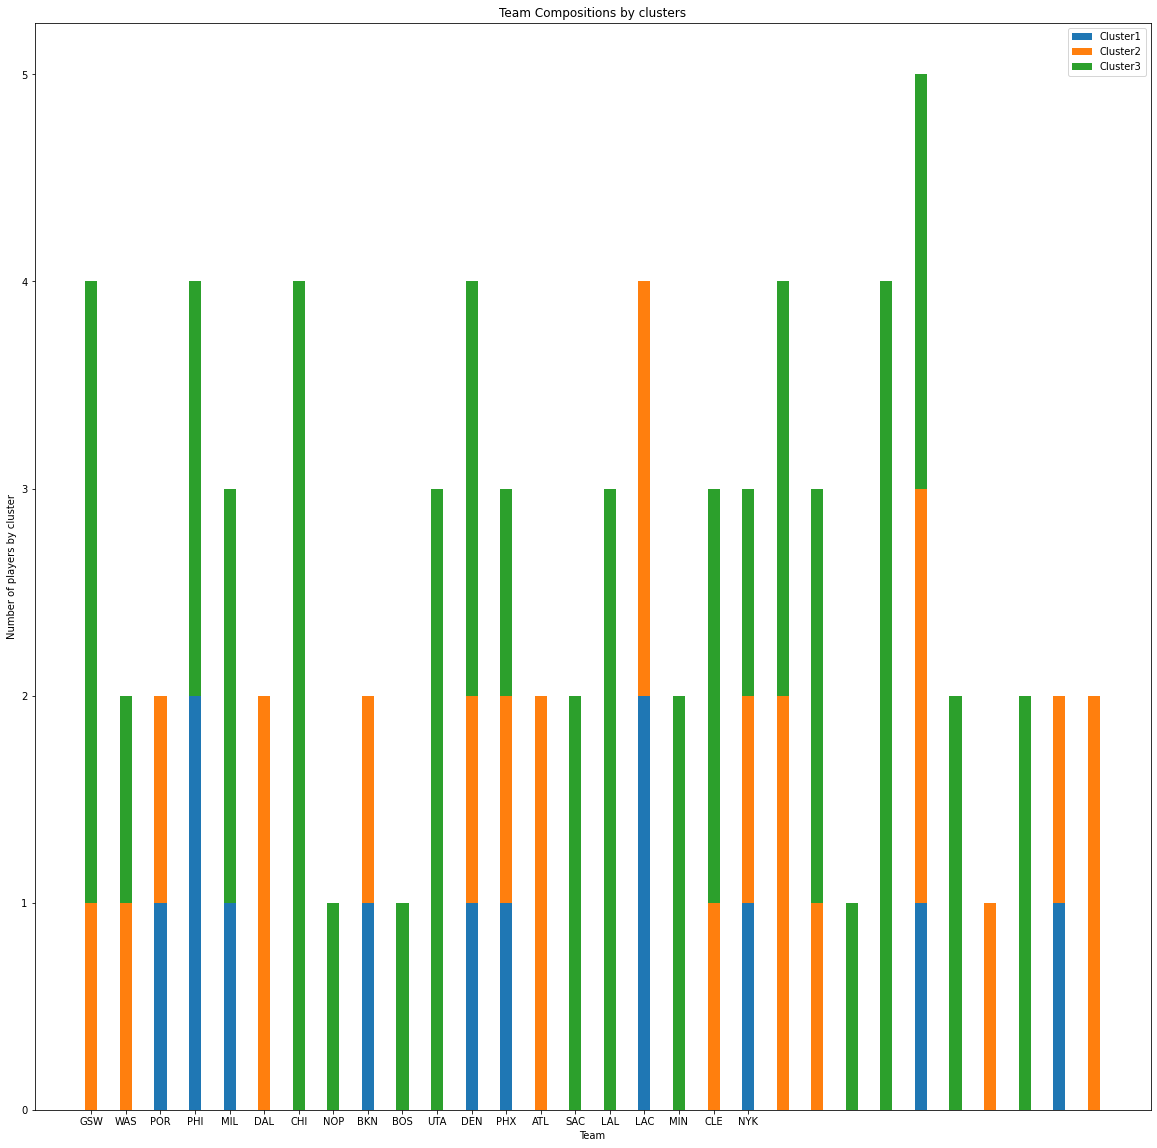

In [467]:
# plt.figure(figsize = (20,20))
# plt.xlabel('Team')
# plt.ylabel('Number of players by cluster')
# plt.title('Team compositions by cluster')

# plt.bar(teamCompositionDf, stacked=True)

labels = teamCompositionDf.Team

print(labels)
width = 0.35       
cluster1 = teamCompositionDf.Cluster1
cluster2 = teamCompositionDf.Cluster2
cluster3 = teamCompositionDf.Cluster3
cluster4 = teamCompositionDf.Cluster4
cluster5 = teamCompositionDf.Cluster5
cluster6 = teamCompositionDf.Cluster6
cluster7 = teamCompositionDf.Cluster7
cluster8 = teamCompositionDf.Cluster8
cluster9 = teamCompositionDf.Cluster9

fig, ax = plt.subplots(figsize=(20,20))
plt.xticks(np.arange(0, 20, 1))

ax.bar(labels, cluster1, width, label='Cluster1')
ax.bar(labels, cluster2, width, bottom=cluster1, label='Cluster2')
ax.bar(labels, cluster3, width, bottom=cluster2, label='Cluster3')
# ax.bar(labels, cluster4, width, bottom=cluster3, label='Cluster4')
# ax.bar(labels, cluster5, width, bottom=cluster4, label='Cluster5')
# ax.bar(labels, cluster6, width, bottom=cluster5, label='Cluster6')
# ax.bar(labels, cluster7, width, bottom=cluster6, label='Cluster7')
# ax.bar(labels, cluster8, width, bottom=cluster7, label='Cluster8')
# ax.bar(labels, cluster9, width, bottom=cluster8, label='Cluster9')

ax.set_ylabel('Number of players by cluster')
ax.set_xlabel("Team")
ax.set_title('Team Compositions by clusters')
ax.legend()

plt.show()